<a href="https://colab.research.google.com/github/InesAgudoMartin/APRENDIZAJE_AUTOMATICO_23_24/blob/main/P4_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRÁCTICA 4

# PARTE 1

## Importación y descarga de librerías necesarias
En este caso:
*  Deap facilita la implementación de algoritmos genéticos en Phyton permitiendo definir como cambian y evolucionan individuos para resolver problemas

*   SciPy sirve para encontrar la mejor solución en problemas usando algoritmos genéticos, ofreciendo funciones de optimización.

*   SCOOP: acelera la evaluación de aptitud en algoritmos genéticos, permitiendo que Phyton haga varias cosas al mismo tiempo.

In [18]:
!pip install deap
!pip install scipy
!pip install scoop

In [19]:
import math #operaciones matemáticas básicas
from mpl_toolkits.mplot3d import Axes3D #para visualizar datos en 3D
from matplotlib import cm #mejor representación visual
import numpy as np #operaciones numéricas y manipulación de arreglos
from deap import base #estructura básica para definir algoritmos evolutivos
from deap import creator #creación de objetos específicos para algoritmos evolutivos
from deap import tools #operaciones comunes como selección y cruce
from deap import algorithms #implementaciones de algoritmos evolutivos para usar
import matplotlib.pyplot as plt #gráficos para facilitar la visualización de datos
import random #generar numeros aleatorios

## INTRODUCCIÓN AL PROBLEMA
Econtrar los máximos de la función "picos":
$f\left(x,y\right)= 3{\left(1-x\right)}^2 e^{-\left(x^2 \right)-{\left(y+1\right)}^2 } -10\left(\frac{x}{5}-x^3 -y^5 \right)e^
{-x^2 -y^2 } -\frac{1}{3}e^{-{\left(x+1\right)}^2 -y^2 }$
Para el dominio:

$\left\lbrace x,y\right\rbrace \in \left\lbrack -100,100\right\rbrack$


En este problema, cada individuo se representa como una lista que tiene dos números: xi e yi, donde \(i\) va desde 1 hasta \(n\). La población de individuos no cambia en tamaño durante el proceso. Al principio, seleccionamos la población inicial de manera aleatoria para asegurarnos de tener diferentes combinaciones genéticas que puedan llevar a soluciones óptimas.

En cuanto a los individuos en este caso vamos a utilizar 30, n=30.
Nuestro tamaño de población L-2L, sabiendo que L=16, ya que necesitamos 8 bits segun el rango dado, que serian 16 por tener dos variables (x,y), deberiamos coger un valor entre L-2L, es decir entre 16-32. Cogemos de ese rango, 30 individuos para el problema.

Con el fin de conseguir diversidad genética, elegimos de manera aleatoria la población incial

## NÚMEROS ALEATORIOS

Generamos los numeros aleatorios a continuación mediante la librería 'random'.
Con la primera línea lo que hacemos es establecer una semilla para asegurarnos de obtener la misma secuencia de números cada vez que ejecutemos el código.
Empleamos el método 'uniform' para que los números generados tengan una distribución uniforme en el rango especificado, es decir, cualquier número dentro de este intervalo tiene la misma probabilidad de ser seleccionado. Asi, conseguimos mantener la aleatoriedad y representar varios escenarios en el problema.
También podíamos haber optado por crear dos conjuntos de diez valores cada uno, en el rango -100 a 100, organizados en una forma de (1, 10), que indica una estructura de fila con diez columnas. Básicamente, serían dos vectores horizontales, cada uno con diez valores.

In [20]:
import random
# Fijamos la semilla
random.seed(0)
# Lista de 10 números aleatorios distribuidos en el rango [-100, 100] para x
x = [random.uniform(-100, 100) for i in range(10)]
# Lista de 10 números aleatorios distribuidos en el rango [-100, 100] para y
y = [random.uniform(-100, 100) for i in range(10)]
print('x= ', x)
print('y= ', y)

x=  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y=  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


Es importante considerar que las soluciones generadas deben ser aceptables, y una solución se consideraría inaceptable si alguna de las variables no cumple con los límites establecidos. En los problemas de algoritmo genético, es habitual encontrarse con restricciones en las variables, por lo que siempre es necesario verificar que nuestras soluciones cumplan con esas restricciones para asegurar su validez. Esto garantiza que las soluciones propuestas sean factibles y útiles para resolver el problema de optimización.

En los problemas de algoritmo genético, es habitual encontrarse con restricciones en las variables, por lo que es necesario comprobar nuestras soluciones y asegurar su validez, para garantizar que son factibles y útiles para resolver el ejercicio. En este problema en particular, nuestra restricción sería el rango, si las soluciones obtenidas no estan dentro de dicho rango establecido, se considerarían no válidas, en este caso, todas son válidas porque están entre -100 y 100.

## ESPACIO DE BÚSQUEDA

Vamos a buscar nuestras soluciones usando el algoritmo genético (AG), aunque podemos hacerlo mediante otras herramientas. Estos algoritmos son útiles cuando no conocemos la mejor solución ni una aproximación. No nos aseguramos encontrar la mejor solucion o la perfecta pero nos asegura llegar a una buena en un tiempo razonable.

## FUNCIÓN OBJETIVO

In [21]:
def funcion_objetivo(x):
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    aux = 3*math.pow(1-x[0],2)*math.exp(-math.pow(x[0],2)-math.pow(x[1]+1,2))
    aux2 = 10*(x[0]/5-math.pow(x[0],3)-math.pow(x[1],5))*math.exp(-math.pow(x[0],2)-math.pow(x[1],2))
    aux3 = math.exp(-math.pow(x[0]+1,2)-math.pow(x[1],2))/3
    res = aux-aux2-aux3
    return res,

## REPRESENTACIÓN DE LA FUNCIÓN

Mostramos una visualización en 3D de la función que en este caso depende de dos variables X e Y. Para ver como cambia la función durante el rango generamos una cuadrícula de puntos y evaluamos la función en cada par de ellos.
Después creamos una gráfica con dichos resultados, para poder observar como cambia conforme variamos X e Y. Con las etiquetas indicamos que variable representa cada eje, y el vertical muestra los valores de la función.


Text(0.5, 0, 'f(X, Y)')

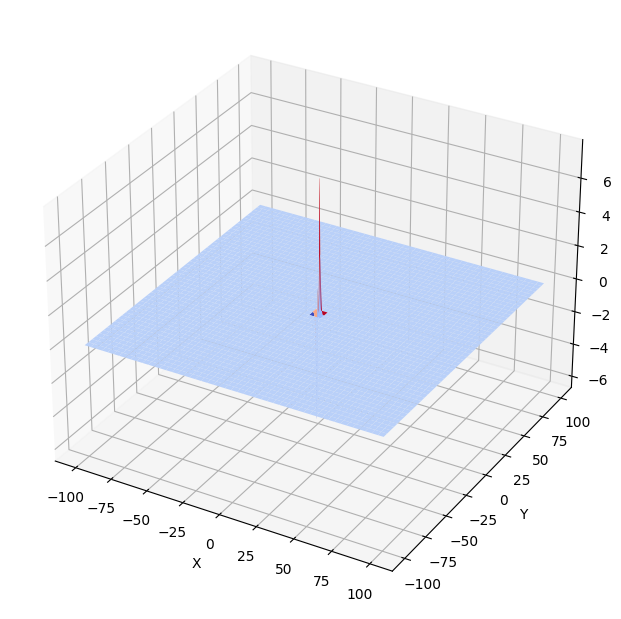

In [22]:
coord_x = np.linspace(-100, 100, 1000)
coord_y = np.linspace(-100, 100, 1000)

# Evaluamos las variables en cada punto de la cuadrícula
#creamos cuadricula de puntos con las coordenadas generadas
grid_x, grid_y = np.meshgrid(coord_x, coord_y)
puntos_evaluados = np.c_[grid_x.ravel(), grid_y.ravel()]
resultados = np.reshape([funcion_objetivo(punto) for punto in puntos_evaluados], (1000, 1000))

figura_3d = plt.figure(figsize=(8, 6))

ejes = figura_3d.add_axes(Axes3D(figura_3d))

#creamos superficie tridimensional con los resultados obtenidos
ejes.plot_surface(grid_x, grid_y, resultados, cmap=cm.coolwarm)

ejes.set_xlabel("X")
ejes.set_ylabel("Y")
ejes.set_zlabel("f(X, Y)")

## 1. Definición del problema y generación de la población inicial

### 1.1 Creación del problema

Primero, configuramos el tipo de problema a resolver, es decir, si queremos encontrar la mejor solucion posible (maximizar) o la menos mala (minimizar). Creamos una clase llamada "FitnessMax" con el método "create", esta clase nos ayuda a definir el tipo de problema al que nos enfrentamos.
En este caso, se trata de un problema que quiere maximizar el objetivo.
La clase "FitnessMax" hereda algunas características de la clase "base.Fitness", nos sirve para evaluar qué tan bueno es cada posible individuo en el problema, teniendo en cuenta una serie de reglas o condiciones que tenemos para medir su rendimiento.
Por ejemplo, la clase nos da una forma de almacenar cómo de bueno es un individuo en cuánto a su rendimiento, y también nos permite comparar dos individuos para ver cuál es mejor, que lo tendremos en cuenta a la hora de buscar soluciones efectivas.

In [23]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### 1.2 Creación de la plantilla del individuo

A continuación, definimos cómo será cada individuo en nuestro algoritmo (como si fuese un objeto con ciertas características). Creamos la plantilla con Phyton, la clase "Individual" esta creada a partir de la clase de listas, un individuo es como una lista que tiene una manera incorporada de guardar y medir su propio desempeño.

In [24]:
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### 1.3 Inidviduos aleatorios y población inicial

En este paso, configuramos las herramientas necesarias para implementar un Algoritmo genético (AG).
Primero, utilizamos la función "generar_valor_aleatorio" para crear genes aleatorios que represetan las variables independientes de una solución potencial. Generamos valores aleaotrios valores en el rango [-100, 100].
Diseñamos como debería de ser un "individuo" con esos genes, creamos su estructura representando un par de variables independientes para una solución candidata.
Con "poblacion" establecemos como se creará la población inicial, en cuyo caso tenemos 32 individuos generados por la función individual. La población representa un conjunto diverso de soluciones iniciales para el problema de optimización.
Evaluamos la aptitud de los individuos con "evaluar" que nos dice qué tan buena es una solución particular.
Para configurar como estos genes pueden cruzarse o combinar sus caracaterísticas definimos el operador de cruce "cruzar", que utiliza el método de dos puntos para combinarlos y generar nuevos descendientes; mientras que el operador "mutar" introduce variabilidad en la población.
Para escoger a los mejores lo hacemos con el operador "seleccionar" que utiliza el método torneo eligiendo aleatoriamente 3 participantes y quedándose con mejor de ese grupo para ser el "ganador" y reproducirse. Esto ayuda a asegurarnos de que los "individuos" más aptos, o los que son mejores en resolver el problema, tengan más oportunidades de tener descendencia y contribuir a la próxima generación.

**CRUCE DE DOS PUNTOS**

Este cruce implica seleccionar dos puntos de corte en los cromosomas de los padres y luego intercambiar las secciones entre estos puntos para crear nuevos cromosomas para la descendencia.

En este caso, utilizamos la función cxTwoPoint de DEAP (tools.cxTwoPoint) para realizar el cruce de dos puntos. Esta función toma dos padres como entrada y devuelve dos hijos después de aplicar dicho cruce

In [25]:
toolboxcruce1 = base.Toolbox()
toolboxcruce1.register("attr_uniform", random.uniform, -100, 100)
toolboxcruce1.register("individual", tools.initRepeat, creator.Individual,
                 toolboxcruce1.attr_uniform, 2)
toolboxcruce1.register("population", tools.initRepeat, list,
                 toolboxcruce1.individual, 32)
toolboxcruce1.register("evaluate", funcion_objetivo)
toolboxcruce1.register("mate", tools.cxTwoPoint)
toolboxcruce1.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolboxcruce1.register("select", tools.selTournament, tournsize=3)

**CRUCE UNIFORME**

Es una técnica que consiste en la selección aleatoria de alelos de los padres para formar la descendencia. Cada alelo de los padres se selecciona con una probabilidad determinada y se coloca en la descendencia.

Con la función cxUniform de DEAP (tools.cxUniform), toma dos padres y una probabilidad 'indpb' como entrada, que es la probabilidad de que cada alelo sea seleccionado del primer padre. Si se selecciona del primer padre con una probabilidad de 'indpb', se selecciona del segundo padre con una probabilidad de '1 - indpb'

In [26]:
toolboxcruce2 = base.Toolbox()
toolboxcruce2.register("attr_uniform", random.uniform, -100, 100)
toolboxcruce2.register("individual", tools.initRepeat, creator.Individual,
                 toolboxcruce2.attr_uniform, 2)
toolboxcruce2.register("population", tools.initRepeat, list,
                 toolboxcruce2.individual, 32)
toolboxcruce2.register("evaluate", funcion_objetivo)
toolboxcruce2.register("mate", tools.cxUniform, indpb=0.5)
toolboxcruce2.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolboxcruce2.register("select", tools.selTournament, tournsize=3)

### 2 Operadores genéticos

En el algoritmo genético:

- **Selección:** Elegimos individuos para tener hijos basándonos en su rendimiento (aptitud) en el problema. Cuanto mejor sea un individuo, más posibilidades tiene de tener descendencia. Usamos torneos donde compiten grupos de 3 individuos, y el mejor gana el derecho a reproducirse.

- **Cruce:** Es la mezcla de información genética entre dos individuos para crear nuevos descendientes. Usamos el método de cruce en un punto, donde elegimos aleatoriamente un punto y cambiamos la información genética entre dos padres.

- **Mutación:** Cambiamos la información genética de un individuo de forma aleatoria. En este caso, aplicamos una mutación gaussiana

**DATOS IMPORTANTES**

- gen: Generación actual del algoritmo.

- nevals: Número total de individuos evaluados, considerando las operaciones de cruce y mutación.

- avg: Desempeño promedio de la población. Incrementa con las generaciones, indicando mejora en la calidad promedio de los individuos.

- std: Desviación estándar del desempeño promedio. Disminuye con las generaciones, mostrando convergencia hacia un rendimiento más homogéneo.

- min: Mínimo desempeño de la población. Aumenta con las generaciones, indicando mejoras en el peor individuo.

- max: Máximo desempeño de la población. Aumenta con las generaciones, señal de mejora global en el rendimiento.

- hof: Para obtener el individuo o el fitness, se utiliza el índice cero.

### Cruce

In [27]:
def twopoint(pop):
    # Definición de la función twopoint que realiza el algoritmo genético con cruce de dos puntos
    # Parámetros:
    #  CXPB: Probabilidad de Cruce
    #  MUTPB: Probabilidad de Mutación
    #  NGEN: Número de Generaciones
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20

    # Creación objeto que almacenará el mejor individuo
    hof = tools.HallOfFame(1)

    #Estadísticas  de cada generación
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean) # Promedio del fitness de la población
    stats.register("std", np.std) # Desviación estándar del fitness de la población
    stats.register("min", np.min) # Valor mínimo del fitness en la población
    stats.register("max", np.max) # Valor máximo del fitness en la población


    # Registro del progreso del algoritmo
    logbook = tools.Logbook()

    #Ejecución con el método eaSimple de DEAP (se especifican los parámetros)
    pop, logbook = algorithms.eaSimple(pop, toolboxcruce1, cxpb=CXPB,
                                          mutpb=MUTPB, ngen=NGEN, stats=stats,
                                          halloffame=hof, verbose=True)
    #devuelve el mejor individuo enconttrado y el registro del proceso
    return hof, logbook

In [28]:
def uniform(pop):
    # Definición de la función uniform que realiza la ejecución con cruce uniforme

    # Parámetros del algoritmo:
    #  CXPB: Probabilidad de Cruce
    #  MUTPB: Probabilidad de Mutación
    #  NGEN: Número de Generaciones
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20

    #objeto que almacenará el mejor individuo encontrado durante la ejecución
    hof = tools.HallOfFame(1)

    #Estadísticas de cada generación
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean) # Promedio del fitness de la población
    stats.register("std", np.std)  # Desviación estándar del fitness de la población
    stats.register("min", np.min)  # Valor mínimo del fitness
    stats.register("max", np.max) # Valor máximo del fitness en la población

    # Registro del progreso del algoritmo en un logbook
    logbook = tools.Logbook()

    #Ejecución del algoritmo genético con el método eaSimple de DEAP (se especifican los parámetros)
    pop, logbook = algorithms.eaSimple(pop, toolboxcruce2, cxpb=CXPB,
                                          mutpb=MUTPB, ngen=NGEN, stats=stats,
                                          halloffame=hof, verbose=True)
    #devuelve el mejor individuo encontrado y el registro del proceso
    return hof, logbook

In [29]:
# Inicialización de listas para almacenar los mejores resultados de cada tipo de cruce

mejores_cruce1 = list()  #mejores resultados cruce de dos puntos
mejores_cruce2 = list()  #mejores resultados cruce uniform

# Inicialización de listas para almacenar los mejores individuos de cada tipo de cruce
mejores_cruce1ind = list() #mejores individuos cruce de dos puntos
mejores_cruce2ind = list() #mejores individuos cruce uniform

# Bucle para realizar 20 ejecuciones del algoritmo genético con cada tipo de cruce
for i in range(20):
    # Fijamos la semilla para reproducibilidad
    random.seed(i)

    pop = toolboxcruce1.population() #cruce dos puntos

    # Ejecutamos algoritmo con cruce de dos puntos
    bestcruce1, logcruce1 = twopoint(pop)
    # Ejecutamos algoritmo con cruce uniforme
    bestcruce2, logcruce2 = uniform(pop)

    # Almacenamos el mejor fitness obtenido en cada ejecución para cada tipo de cruce
    mejores_cruce1.append(bestcruce1[0].fitness.values)
    mejores_cruce2.append(bestcruce2[0].fitness.values)

    # Almacenamos el mejor individuo obtenido en cada ejecución para cada tipo de cruce
    mejores_cruce1ind.append(bestcruce1[0])
    mejores_cruce2ind.append(bestcruce2[0])

    # Calculamos la media y el mejor resultado con el primer tipo de cruce
    media_cruce1 = np.mean(mejores_cruce1)
    mejor_total_cruce1 = max(mejores_cruce1)


    print("Media con primer tipo de cruce: %f" % media_cruce1)
    print("Mejor con primer tipo de cruce: %f" % mejor_total_cruce1)

    # Calculamos la media y el mejor resultado con el segundo tipo de cruce
    media_cruce2 = np.mean(mejores_cruce2)
    mejor_total_cruce2 = max(mejores_cruce2)
    print("Media con segundo tipo de cruce: %f" % media_cruce2)
    print("Mejor con segundo tipo de cruce: %f" % mejor_total_cruce2)


gen	nevals	avg         	std         	min          	max        
0  	32    	2.05256e-125	1.14282e-124	-4.39982e-279	6.5682e-124
1  	17    	4.15586e-118	2.31389e-117	0            	1.32988e-116
2  	12    	1.24677e-117	3.87633e-117	0            	1.32988e-116
3  	18    	0.00945274  	0.0526307   	0            	0.302488    
4  	20    	0.0247413   	0.098625    	-3.08547e-07 	0.489234    
5  	21    	0.034194    	0.109677    	7.09187e-128 	0.489234    
6  	18    	0.133159    	0.191893    	1.32988e-116 	0.489234    
7  	20    	0.233915    	0.218132    	-0.0137064   	0.489234    
8  	14    	0.406955    	0.178098    	-1.9047e-05  	0.489234    
9  	21    	0.473945    	0.0851231   	7.00237e-10  	0.489234    
10 	15    	0.458657    	0.118425    	8.76842e-20  	0.489234    
11 	19    	0.489234    	0           	0.489234     	0.489234    
12 	15    	0.472302    	0.094272    	-0.0525819   	0.489234    
13 	15    	0.477593    	0.0881471   	4.18793e-25  	0.605955    
14 	16    	0.477495    	0.0886776   	-0.00

### RESULTADOS DEL ALGORITMO GENÉTICO

En cuanto al análisis de los resultados obtenidos después de ejecutar el algoritmo:

**Método de Cruce de Dos Puntos:**
- Podemos ver una media de fitness de 0.469513 y el mejor fitness fue de 4.079130

**Método de Cruce Uniforme:**
- En este método, la media del fitness fue de 3.371955 y el mejor fitness alcanzó el valor de 7.710694

Con estos resultados conseguimos una comparativa sobre el desempeño de los algoritmos genéticos con distintas estrategias de cruce. En el método de cruce de dos puntos, aunque la media del fitness es menor en comparación con el cruce uniforme, se destaca por haber encontrado un mejor fitness individual más alto.

- El método de cruce de dos puntos parece ser más efectivo a la hora de encontrar soluciones de alta calidad, como nos indica el mejor fitness individual obtenido.
- Sin embargo, la media del fitness es más baja en este método, lo que nos puede dar a entender que, en promedio, los individuos tienen un desempeño inferior en comparación con el cruce uniforme.

Con lo anterior podríamos llegar a la conclusión de que el cruce de dos puntos se centra en la explotación del espacio de búsqueda, buscando soluciones óptimas, mientras que el cruce uniforme puede ofrecer una exploración más diversificada del espacio de búsqueda.

In [30]:
def plot_evolucion(log, titulo):


    gen = log.select("gen") # Generaciones
    fit_mins = log.select("min") # Fitness mínimo
    fit_maxs = log.select("max") # Fitness máximo
    fit_ave = log.select("avg") # Fitness promedio

    # Crear figura y ejes
    fig, ax1 = plt.subplots()

    # Graficar los datos de fitness mínimo, máximo y promedio en el mismo gráfico
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")

    # Etiquetas de los ejes y título del gráfico
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-50, 50])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")

    #cuadrícula en el gráfico
    plt.grid(True)

    plt.title(titulo)

A tener en cuenta en las gráficas:

1. **Gráfica de Fitness Mínimo (línea azul):** representa la evolución del individuo con el peor desempeño en cada generación. Si esta curva se mantiene relativamente estable o aumenta de manera constante, podría indicar que los operadores favorecen la explotación, porque los menos aptos tienden a mejorar con el tiempo. Si disminuye significativamente, podría indicar una mayor exploración, donde se están probando nuevas soluciones que pueden no ser óptimas en un principio.

2. **Gráfica de Fitness Máximo (línea roja):** se refiere a la evolución del individuo con el mejor desempeño en cada generación. Si tiende a aumentar de manera constante o se mantiene estable en un nivel alto, podría sugerir que los operadores están favoreciendo la explotación, ya que los individuos muy aptos son seleccionados y mejorados. Por el contrario, podría indicar una mayor exploración, donde se están descubriendo nuevas soluciones que pueden superar al mejor individuo actual.

3. **Gráfica de Fitness Promedio (línea discontinua):** muestra la evolución del fitness promedio de la población en cada generación. Si esta curva aumenta constantemente o se mantiene estable en un nivel alto, los operadores están favoreciendo la explotación, ya que la población en general tiende a mejorar. Si la curva disminuye, indica una mayor exploración, donde se están probando y evaluando una variedad de soluciones.

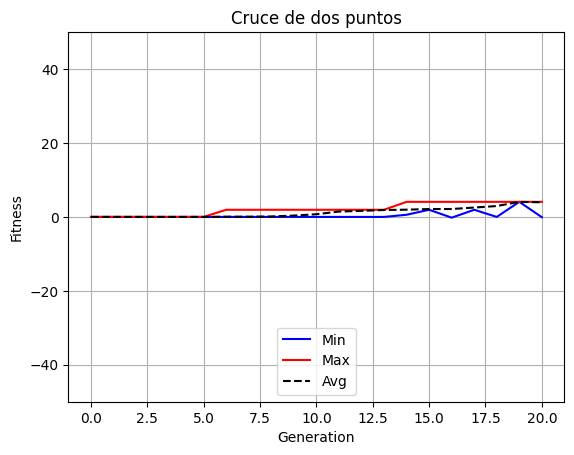

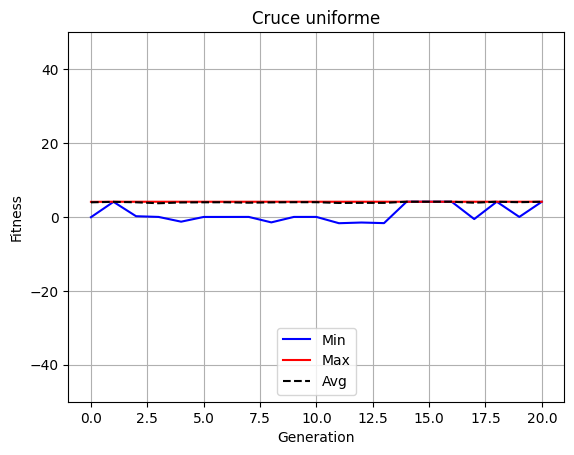

In [31]:
#Trazamos la evolución del algoritmo con cada tipo de cruce
plot_evolucion(logcruce1, 'Cruce de dos puntos')
plot_evolucion(logcruce2, 'Cruce uniforme')

### INTERPRETACIÓN GRÁFICAS

**CRUCE DE DOS PUNTOS**

En esta gráfica, vemos que hay momentos en los que el fitness sube y baja, lo que nos indica que se están probando diferentes soluciones (exploración), pero también hay periodos de estabilidad donde el fitness se mantiene constante o mejora gradualmente (explotación). Con esto, diremos que el cruce de dos puntos equilibra tanto la exploración como la explotación, utilizando diferentes estrategias para encontrar buenas soluciones.

**CRUCE UNIFORME**

Por otro lado, la gráfica del cruce uniforme muestra menos altibajos en el fitness, lo que quiere decir que se centra más en mejorar las soluciones existentes (explotación). Aunque aún hay algunos cambios pequeños en el fitness minimo, se están probando nuevas soluciones en menor medida (exploración). Este tipo de cruce parece priorizar más la explotación que la exploración en este caso.

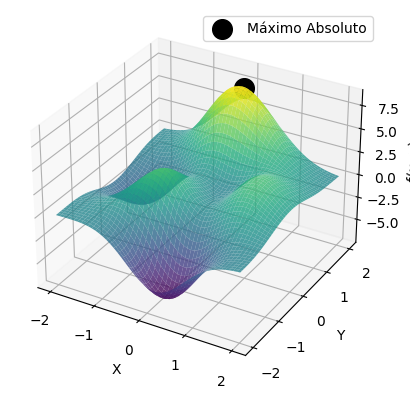

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función
def f(x):
    return 3 * (1 - x[0])**2 * np.exp(-(x[0]**2 + (x[1] + 1)**2)) - \
           10 * (x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-(x[0]**2 + x[1]**2)) - \
           1/3 * np.exp(-((x[0] + 1)**2 + x[1]**2))

# Generar datos para graficar
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

# Coordenadas del punto máximo
max_point = (0.07, 1.60, f([0.07, 1.60]))

# Graficar la función
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(*max_point, color='black', marker='o', s=200, label='Máximo Absoluto')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.show()


# PARTE 2

Para este ejercicio, primero vamos a explorar cómo utilizar el método PSO para encontrar los picos máximos de una función, para minimizar la función de Rastrigin y para comparar el funcionamiento del algoritmo genético para cruce con un punto con cruce con dos puntos.

Stopping search: Swarm best objective change less than 1e-08
PSO:
Punto de mínimo: [-9.95158515e-01  9.94984955e-01 -1.98999444e+00 -1.98995437e+00
 -9.94662819e-01 -1.43667779e-06  1.98968596e+00  1.72683764e-05
  2.98485590e+00 -2.26212762e-04]
Valor mínimo función: 23.879019433933223

Cruce de un punto:
Punto de mínimo: [ 5.31033493e-10  4.98652071e-10  1.33126036e-09  4.89275408e-09
  1.49262860e-09 -1.04647711e-09 -2.04660466e-09  2.34420668e-09
 -3.33582989e-09 -3.22956282e-09]
Valor mínimo función: 0.0

Cruce de dos puntos:
Punto de mínimo: [-1.27638075e-08  9.94958610e-01  9.94958640e-01  9.94958650e-01
  9.94958639e-01 -1.70009304e-08 -9.94958674e-01  9.94958622e-01
 -8.07170297e-09  9.94958629e-01]
Valor mínimo función: 6.964713399653647


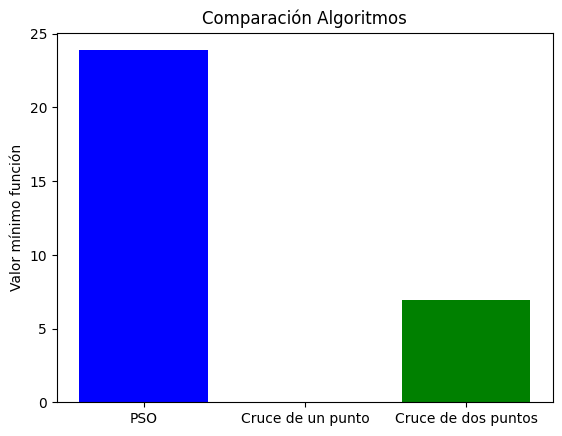

In [33]:
!pip install pyswarm

from pyswarm import pso
from scipy.optimize import differential_evolution

# Definir la función de Rastrigin
def rastrigin(x):
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Número de dimensiones
n = 10

# Definir los límites para cada dimensión
li = [-5.12] * n  # límite inferior para cada dimensión
ls = [5.12] * n    # límite superior para cada dimensión

# Utilizar PSO para minimizar la función de Rastrigin
x_pso, f_pso = pso(rastrigin, li, ls)

# Mostrar resultados para PSO
print("PSO:")
print("Punto de mínimo:", x_pso)
print("Valor mínimo función:", f_pso)

# Algoritmo genético con cruce de un punto
rg_un_punto = differential_evolution(rastrigin, bounds=[(-5.12, 5.12)] * n, strategy='best1bin')

# Mostrar resultados para el algoritmo genético con cruce de un punto
print("\nCruce de un punto:")
print("Punto de mínimo:", rg_un_punto.x)
print("Valor mínimo función:", rg_un_punto.fun)

# Algoritmo genético con cruce de dos puntos
rg_dos_puntos = differential_evolution(rastrigin, bounds=[(-5.12, 5.12)] * n, strategy='best2bin')

# Mostrar resultados para el algoritmo genético con cruce de dos puntos
print("\nCruce de dos puntos:")
print("Punto de mínimo:", rg_dos_puntos.x)
print("Valor mínimo función:", rg_dos_puntos.fun)

# Crear una gráfica comparativa
labels = ['PSO', 'Cruce de un punto', 'Cruce de dos puntos']
values = [f_pso, rg_un_punto.fun, rg_dos_puntos.fun]

plt.bar(labels, values, color=['blue', 'orange', 'green'])
plt.ylabel('Valor mínimo función')
plt.title('Comparación Algoritmos')
plt.show()

**Método PSO:**

El método PSO lo utilizamos para encontrar  picos máximos en funciones complejas como "picos" porque puede explorar eficazmente el espacio de búsqueda. Utiliza una población de soluciones candidatas (partículas) que se mueven en el espacio de búsqueda siguiendo las más mejores soluciones encontradas hasta el momento.
Ajusta la velocidad y posición de cada partícula y las soluciones de partículas cercanas.Con esto conseguimos explorar tanto globalmente como localmente el espacio de búsqueda.
A la hora de minimizar la función de Rastrigin con este procedimiento podemos hacerlo de manera eficiente.
Los pasos principales de PSO incluyen la inicialización de partículas, la evaluación de su aptitud, la actualización de su velocidad y posición, y la repetición de estos pasos hasta que se cumpla un criterio de parada.

**Diferencias en ejecuciones multiples:**

En cuanto a las diferencias que presenta según la ejecución se deben a la inicialización aleatoria de las partículas y la exploración aleatoria del espacio de búsqueda.
El método puede empezar desde diferentes puntos de partida y explorar diferentes trayectorias en el espacio de búsqueda, lo que devuelve resultados un poco diferentes en ejecuciones múltiples.
Además, las condiciones de parada pueden influir en cuándo termina la ejecución de PSO, lo que puede influir y afectar los resultados finales.